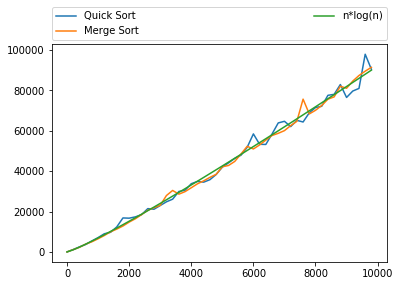

In [27]:
def MergeSort(arr):
    if len(arr)<=1:
        return arr
    else:
        left = MergeSort(arr[:len(arr)//2])
        right = MergeSort(arr[len(arr)//2:])
        s_arr = []
        while len(left)>0 and len(right)>0:
            if left[0] > right[0]:
                s_arr.append(right.pop(0))
            else:
                s_arr.append(left.pop(0))
        return s_arr + left + right

def QuickSort(arr):
    if len(arr)<=1:
        return arr
    else:
        pivot = arr[0]
        left = QuickSort(list(filter((lambda x : x<pivot),arr)))
        mid = list(filter((lambda x : x==pivot),arr))
        right = QuickSort(list(filter((lambda x : x>pivot),arr)))
        return left+mid+right
    
import random as r
import time as t
import math
from matplotlib import pyplot as plt
xs,yms,y,yqs = [],[],[],[]
for i in range(1,10000,200):
    tester = list(r.random() for x in range(i))
    t1 = t.clock()
    MergeSort(tester)
    t2 = t.clock()
    million = 1000000
    microsecs = int(t2*million - t1*million)
    xs.append(i)
    yms.append(microsecs)
    y.append(i*math.log(i))    
for i in range(1,10000,200):
    tester = list(r.random() for x in range(i))
    t1 = t.clock()
    QuickSort(tester)
    t2 = t.clock()
    million = 1000000
    microsecs = int(t2*million - t1*million)
    yqs.append(microsecs)    
a=plt.plot(xs,yqs,label="Quick Sort")
b=plt.plot(xs,yms,label="Merge Sort")
c=plt.plot(xs,y,label="n*log(n)")
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=2, mode="expand", borderaxespad=0.)
plt.show()    